In [1]:
from concurrent.futures import ThreadPoolExecutor
import os
import pandas as pd

def procesar_archivo(ruta_archivo):
    print(f"Procesando archivo: {ruta_archivo}")

    archivo = os.path.basename(ruta_archivo)
    nombre_compuesto = archivo.split('_')[0]

    if archivo.endswith('.xlsx'):
        df = pd.read_excel(ruta_archivo)
    elif archivo.endswith('.csv'):
        df = pd.read_csv(ruta_archivo, delimiter=';')
    else:
        return None

    df = df.drop(['MAGNITUD', 'PUNTO_MUESTREO'], axis=1)
    df_melt = df.melt(id_vars=['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'ANNO', 'MES', 'DIA'],
                      var_name='HORA', value_name='VALOR')
    df_melt['HORA'] = df_melt['HORA'].str.extract('(\d+)').astype(int)
    df_melt['FECHA'] = pd.to_datetime(df_melt[['ANNO', 'MES', 'DIA', 'HORA']].rename(
        columns={'ANNO': 'year', 'MES': 'month', 'DIA': 'day', 'HORA': 'hour'}))
    df_melt.drop(['ANNO', 'MES', 'DIA', 'HORA'], axis=1, inplace=True)
    df_melt['COMPUESTO'] = nombre_compuesto
    df_melt = df_melt[['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'FECHA', 'COMPUESTO', 'VALOR']]
    print(f"Archivo {archivo} procesado.")
    return df_melt


años = [ 2020, 2021, 2022]
lista_datasets = []  
for año in años:
    ruta_carpeta = f"Dades/{año}/"
    print(f"Iniciando el procesamiento para el año {año}")
    rutas_archivos = [os.path.join(ruta_carpeta, archivo) for archivo in os.listdir(ruta_carpeta)]
    with ThreadPoolExecutor() as executor:
        resultados = list(executor.map(procesar_archivo, rutas_archivos))
    resultados = [df for df in resultados if df is not None]
    lista_datasets.extend(resultados)
    print(f"Finalizado el procesamiento para el año {año}.\n")


<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\d'
C:\Users\marcs\AppData\Local\Temp\ipykernel_13704\931887906.py:21: SyntaxWarning: invalid escape sequence '\d'
  df_melt['HORA'] = df_melt['HORA'].str.extract('(\d+)').astype(int)


Iniciando el procesamiento para el año 2020
Procesando archivo: Dades/2020/C6H6_HH_2020.csv
Procesando archivo: Dades/2020/CO_HH_2020.csv
Procesando archivo: Dades/2020/NO2_HH_2020.csv
Procesando archivo: Dades/2020/NOx_HH_2020.csv
Procesando archivo: Dades/2020/NO_HH_2020.csv
Procesando archivo: Dades/2020/O3_HH_2020.csv
Procesando archivo: Dades/2020/PM10_HH_2020.csv
Procesando archivo: Dades/2020/PM25_HH_2020.csv
Procesando archivo: Dades/2020/SO2_HH_2020.csv
Archivo C6H6_HH_2020.csv procesado.
Archivo PM25_HH_2020.csv procesado.
Archivo CO_HH_2020.csv procesado.
Archivo PM10_HH_2020.csv procesado.
Archivo O3_HH_2020.csv procesado.
Archivo SO2_HH_2020.csv procesado.
Archivo NO2_HH_2020.csv procesado.
Archivo NO_HH_2020.csv procesado.
Archivo NOx_HH_2020.csv procesado.
Finalizado el procesamiento para el año 2020.

Iniciando el procesamiento para el año 2021
Procesando archivo: Dades/2021/20_HH_2021.csv
Procesando archivo: Dades/2021/31_HH_2021.csv
Procesando archivo: Dades/2021/42_H

In [2]:
df_final = pd.concat(lista_datasets, ignore_index=True)
lista_datasets = []
df_pivot = pd.pivot_table(df_final,
                          values='VALOR',
                          index=['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'FECHA'],
                          columns=['COMPUESTO'],
                          aggfunc='first').reset_index()


In [3]:
import os
path = 'Dades\Metainformacion2022.xlsx'
estaciones = pd.read_excel(path, sheet_name='Estaciones')
estaciones = estaciones.drop(['COD_LOCAL', 'COD_ESTACION_DEM', 'N_RED', 'NOMBRE', 'FECHA_INI', 'FECHA_FIN', 'N_CCAA', 'N_PROVINCIA', 'N_MUNICIPIO', 'TIPO_SUBAREA_RURAL','EST', 'DIRECCION', ], axis=1)

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\marcs\AppData\Local\Temp\ipykernel_13704\2545956728.py:2: SyntaxWarning: invalid escape sequence '\M'
  path = 'Dades\Metainformacion2022.xlsx'


In [4]:

columnas_de_interes = ['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'LATITUD_G', 'LONGITUD_G', 'ALTITUD',	'TIPO_ESTACION',	'TIPO_AREA',	'ZONA']
df_estaciones_reducido = estaciones[columnas_de_interes]
df_final = pd.merge(df_pivot, df_estaciones_reducido, how='left', on=['PROVINCIA', 'MUNICIPIO', 'ESTACION'])
df_final = df_final.drop(['PROVINCIA', 'MUNICIPIO', 'ESTACION','20','31','42','431','44'], axis=1)
porcentaje_nan = (df_final.isna().sum() / len(df_final)) * 100
print(porcentaje_nan)
print(df_final.isna().sum())

FECHA             0.000000
C6H6             86.956324
CO               64.740811
NO               70.497492
NO2              10.013569
NOx              41.867155
O3               25.928381
PM10             38.360481
PM25             67.410252
SO2              28.482975
LATITUD_G         2.835253
LONGITUD_G        2.835253
ALTITUD           2.835253
TIPO_ESTACION     2.835253
TIPO_AREA         2.835253
ZONA              3.013363
dtype: float64
FECHA                   0
C6H6             12698019
CO                9453942
NO               10294576
NO2               1462257
NOx               6113758
O3                3786258
PM10              5601687
PM25              9843754
SO2               4159299
LATITUD_G          414025
LONGITUD_G         414025
ALTITUD            414025
TIPO_ESTACION      414025
TIPO_AREA          414025
ZONA               440034
dtype: int64


In [5]:
import numpy as np
df_final = df_final.dropna(subset=['LATITUD_G', 'LONGITUD_G'])
def reemplazar_negativos(valor):
    if pd.isna(valor):
        return valor
    return max(0, valor)
columnas_a_modificar = [col for col in df_final.columns if col not in ['LATITUD_G', 'LONGITUD_G', 'FECHA', 'TIPO_ESTACION', 'TIPO_AREA', 'ZONA']]
df_final[columnas_a_modificar] = df_final[columnas_a_modificar].applymap(reemplazar_negativos)
print(df_final.describe())

C:\Users\marcs\AppData\Local\Temp\ipykernel_13704\730693195.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_final[columnas_a_modificar] = df_final[columnas_a_modificar].applymap(reemplazar_negativos)


                               FECHA          C6H6            CO  \
count                       14188730  1.898370e+06  5.080975e+06   
mean   2021-07-10 03:01:30.030636800  4.371787e-01  2.975386e-01   
min              2020-01-01 01:00:00  0.000000e+00  0.000000e+00   
25%              2020-10-12 15:00:00  9.000000e-02  1.130000e-01   
50%              2021-07-13 19:00:00  2.000000e-01  2.350000e-01   
75%              2022-04-09 05:00:00  6.000000e-01  4.000000e-01   
max              2023-01-01 00:00:00  4.293000e+02  1.970000e+01   
std                              NaN  1.000288e+00  2.234421e-01   

                 NO           NO2           NOx            O3          PM10  \
count  4.129467e+06  1.279770e+07  8.207239e+06  1.059902e+07  8.751269e+06   
mean   5.647706e+00  1.316387e+01  2.102640e+01  5.815519e+01  2.059179e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+00  4.000000e+00  5.400000e+00  4.000000e+01  9.000000

In [6]:
df_final = df_final.query('not (27.6 <= LATITUD_G <= 29.4 and -18.3 <= LONGITUD_G <= -13.3)')

In [7]:
df_final_filtrado = df_final.sort_values(by=['FECHA', 'LATITUD_G', 'LONGITUD_G'], ascending=[True, True, True])

In [8]:
df_final_filtrado

,FECHA,C6H6,CO,NO,NO2,NOx,O3,PM10,PM25,SO2,LATITUD_G,LONGITUD_G,ALTITUD,TIPO_ESTACION,TIPO_AREA,ZONA
14576732,2020-01-01 01:00:00,NaN,NaN,2.01,6.67,9.76,94.24,6.75,2.91,NaN,35.89300,-5.31470,1.0,FONDO,URBANA,MAR(CERCA)
2819459,2020-01-01 01:00:00,0.0,0.407,3.00,30.00,33.00,56.00,8.56,NaN,4.0,36.13623,-5.45343,24.0,INDUSTRIAL,URBANA,INDUSTRIAL
3074731,2020-01-01 01:00:00,NaN,NaN,4.00,7.00,10.00,NaN,11.77,NaN,2.0,36.15937,-5.34836,1.0,INDUSTRIAL,URBANA,RESIDENCIAL
2793624,2020-01-01 01:00:00,NaN,NaN,5.00,13.00,22.00,NaN,NaN,NaN,5.0,36.16170,-5.44260,1.0,INDUSTRIAL,URBANA,RESIDENCIAL/INDUSTRIAL
3100789,2020-01-01 01:00:00,NaN,NaN,6.00,11.00,18.00,NaN,NaN,NaN,7.0,36.17315,-5.34194,8.0,FONDO,URBANA,RESIDENCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9097726,2023-01-01 00:00:00,NaN,0.510,NaN,18.00,NaN,49.00,28.00,NaN,1.0,43.55890,-5.92750,12.0,TRAFICO,URBANA,RESIDENCIAL/COMERCIAL
9123331,2023-01-01 00:00:00,NaN,0.080,NaN,6.00,NaN,33.00,12.00,1.00,NaN,43.57050,-5.95830,8.0,FONDO,SUBURBANA,RESIDENCIAL/INDUSTRIAL
9071712,2023-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,24.00,NaN,NaN,43.57920,-5.92730,6.0,INDUSTRIAL,SUBURBANA,INDUSTRIAL
7021816,2023-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,12.00,5.00,NaN,43.65910,-7.36320,173.0,FONDO,URBANA,RESIDENCIAL/INDUSTRIAL/NATURALEZA


In [9]:
df_final_filtrado['coord_id'] = df_final_filtrado['LATITUD_G'].astype(str) + "_" + df_final_filtrado['LONGITUD_G'].astype(str)
estaciones_por_momento = df_final_filtrado.groupby('FECHA')['coord_id'].nunique()
print(estaciones_por_momento)


FECHA
2020-01-01 01:00:00    470
2020-01-01 02:00:00    470
2020-01-01 03:00:00    469
2020-01-01 04:00:00    469
2020-01-01 05:00:00    469
                      ... 
2022-12-31 20:00:00    506
2022-12-31 21:00:00    506
2022-12-31 22:00:00    506
2022-12-31 23:00:00    504
2023-01-01 00:00:00    505
Name: coord_id, Length: 26304, dtype: int64


In [10]:
df_final_filtrado.columns

Index(['FECHA', 'C6H6', 'CO', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM25', 'SO2',
       'LATITUD_G', 'LONGITUD_G', 'ALTITUD', 'TIPO_ESTACION', 'TIPO_AREA',
       'ZONA', 'coord_id'],
      dtype='object')

#### Revisar

In [11]:
columnas_constantes = ['LATITUD_G', 'LONGITUD_G', 'ALTITUD', 'TIPO_ESTACION', 'TIPO_AREA',
       'ZONA', 'coord_id']
df_constantes = df_final_filtrado[columnas_constantes].drop_duplicates('coord_id')


In [12]:
momentos_unicos = df_final_filtrado['FECHA'].unique()
estaciones_unicas = df_final_filtrado['coord_id'].unique()
index_completo = pd.MultiIndex.from_product([momentos_unicos, estaciones_unicas], names=['FECHA', 'coord_id'])
df_completo = pd.DataFrame(index=index_completo).reset_index()

df_completo = pd.merge(df_completo, df_constantes, on='coord_id', how='left')

df_completo = pd.merge(df_completo, df_final_filtrado, on=['FECHA', 'coord_id'], how='left')



In [13]:

df_completo = df_completo.rename(columns={
    'LATITUD_G_x': 'LATITUD_G',
    'LONGITUD_G_x': 'LONGITUD_G',
    'ALTITUD_x': 'ALTITUD',
    'TIPO_ESTACION_x': 'TIPO_ESTACION',
    'TIPO_AREA_x': 'TIPO_AREA',
    'ZONA_x': 'ZONA'
})


df_completo.columns

Index(['FECHA', 'coord_id', 'LATITUD_G', 'LONGITUD_G', 'ALTITUD',
       'TIPO_ESTACION', 'TIPO_AREA', 'ZONA', 'C6H6', 'CO', 'NO', 'NO2', 'NOx',
       'O3', 'PM10', 'PM25', 'SO2', 'LATITUD_G_y', 'LONGITUD_G_y', 'ALTITUD_y',
       'TIPO_ESTACION_y', 'TIPO_AREA_y', 'ZONA_y'],
      dtype='object')

In [14]:

df_completo = df_completo.rename(columns={'altitud': 'altura'})


In [15]:
df_completo = df_completo.drop([ 'LATITUD_G_y', 'LONGITUD_G_y', 'ALTITUD_y',
       'TIPO_ESTACION_y', 'TIPO_AREA_y', 'ZONA_y' ], axis=1)
df_completo.columns

Index(['FECHA', 'coord_id', 'LATITUD_G', 'LONGITUD_G', 'ALTITUD',
       'TIPO_ESTACION', 'TIPO_AREA', 'ZONA', 'C6H6', 'CO', 'NO', 'NO2', 'NOx',
       'O3', 'PM10', 'PM25', 'SO2'],
      dtype='object')

In [16]:

df_completo

,FECHA,coord_id,LATITUD_G,LONGITUD_G,ALTITUD,TIPO_ESTACION,TIPO_AREA,ZONA,C6H6,CO,NO,NO2,NOx,O3,PM10,PM25,SO2
0,2020-01-01 01:00:00,35.893_-5.3147,35.89300,-5.31470,1.0,FONDO,URBANA,MAR(CERCA),NaN,NaN,2.01,6.67,9.76,94.24,6.75,2.91,NaN
1,2020-01-01 01:00:00,36.13623_-5.45343,36.13623,-5.45343,24.0,INDUSTRIAL,URBANA,INDUSTRIAL,0.00,0.407,3.00,30.00,33.00,56.00,8.56,NaN,4.0
2,2020-01-01 01:00:00,36.15937_-5.34836,36.15937,-5.34836,1.0,INDUSTRIAL,URBANA,RESIDENCIAL,NaN,NaN,4.00,7.00,10.00,NaN,11.77,NaN,2.0
3,2020-01-01 01:00:00,36.1617_-5.4426,36.16170,-5.44260,1.0,INDUSTRIAL,URBANA,RESIDENCIAL/INDUSTRIAL,NaN,NaN,5.00,13.00,22.00,NaN,NaN,NaN,5.0
4,2020-01-01 01:00:00,36.17315_-5.34194,36.17315,-5.34194,8.0,FONDO,URBANA,RESIDENCIAL,NaN,NaN,6.00,11.00,18.00,NaN,NaN,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13467643,2023-01-01 00:00:00,39.9694_0.0089,39.96940,0.00890,0.0,INDUSTRIAL,SUBURBANA,RESIDENCIAL/INDUSTRIAL,0.30,NaN,NaN,NaN,NaN,3.00,25.00,22.00,NaN
13467644,2023-01-01 00:00:00,43.34305_-8.44914,43.34305,-8.44914,100.0,INDUSTRIAL,SUBURBANA,RESIDENCIAL/INDUSTRIAL,NaN,NaN,NaN,1.50,NaN,NaN,5.20,3.50,2.5
13467645,2023-01-01 00:00:00,43.5427_-5.7093,43.54270,-5.70930,12.0,INDUSTRIAL,SUBURBANA,RESIDENCIAL/COMERCIAL,0.39,NaN,NaN,8.00,NaN,40.00,17.00,8.00,1.0
13467646,2023-01-01 00:00:00,43.6591_-7.3632,43.65910,-7.36320,173.0,FONDO,URBANA,RESIDENCIAL/INDUSTRIAL/NATURALEZA,NaN,NaN,NaN,NaN,NaN,NaN,12.00,5.00,NaN


In [17]:
print(df_completo.isna().sum())

FECHA                   0
coord_id                0
LATITUD_G               0
LONGITUD_G              0
ALTITUD                 0
TIPO_ESTACION           0
TIPO_AREA               0
ZONA                26304
C6H6             11756394
CO                8891778
NO                9702902
NO2               1822298
NOx               6002092
O3                4018146
PM10              5902716
PM25              9855913
SO2               4574760
dtype: int64


In [18]:

estaciones_por_momento = df_completo.groupby('FECHA')['coord_id'].nunique()

print(estaciones_por_momento)


FECHA
2020-01-01 01:00:00    512
2020-01-01 02:00:00    512
2020-01-01 03:00:00    512
2020-01-01 04:00:00    512
2020-01-01 05:00:00    512
                      ... 
2022-12-31 20:00:00    512
2022-12-31 21:00:00    512
2022-12-31 22:00:00    512
2022-12-31 23:00:00    512
2023-01-01 00:00:00    512
Name: coord_id, Length: 26304, dtype: int64


In [19]:
df_final_filtrado=df_completo

In [20]:

estaciones_por_momento = df_final_filtrado.groupby('FECHA')['coord_id'].nunique()

print(estaciones_por_momento)

FECHA
2020-01-01 01:00:00    512
2020-01-01 02:00:00    512
2020-01-01 03:00:00    512
2020-01-01 04:00:00    512
2020-01-01 05:00:00    512
                      ... 
2022-12-31 20:00:00    512
2022-12-31 21:00:00    512
2022-12-31 22:00:00    512
2022-12-31 23:00:00    512
2023-01-01 00:00:00    512
Name: coord_id, Length: 26304, dtype: int64


In [21]:
numeric_cols = df_final_filtrado.select_dtypes(include=['number']).columns
df_final_filtrado['FECHA'] = pd.to_datetime(df_final_filtrado['FECHA'])
df_final_filtrado = df_final_filtrado.sort_values(['FECHA', 'LATITUD_G', 'LONGITUD_G'])
def interpolar_grupo(grupo):
    grupo['diff_hours'] = grupo['FECHA'].diff().dt.total_seconds() / 3600
    
    for col in numeric_cols:
        mask = grupo['diff_hours'] <= 8
        grupo.loc[mask, col] = grupo.loc[mask, col].interpolate(method='linear')
    grupo.drop('diff_hours', axis=1, inplace=True)
    
    return grupo

df_interpolado = df_final_filtrado.groupby(['LATITUD_G', 'LONGITUD_G']).apply(interpolar_grupo).reset_index(drop=True)


In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LassoLars
import pandas as pd
import numpy as np

numeric_cols = df_final_filtrado.select_dtypes(include=['number']).columns
iterative_imputer = IterativeImputer(max_iter=20, random_state=0)
df_numeric_imputed = iterative_imputer.fit_transform(df_final_filtrado[numeric_cols])
df_numeric_imputed = pd.DataFrame(df_numeric_imputed, columns=numeric_cols)
df_final_filtrado_copy1 = df_final_filtrado.copy()
df_final_filtrado_copy1.reset_index(drop=True, inplace=True)
df_numeric_imputed.reset_index(drop=True, inplace=True)
df_final_filtrado_copy1[numeric_cols] = df_numeric_imputed

iterative_imputer_lasso_lars = IterativeImputer(estimator=LassoLars(), max_iter=10, random_state=0)
df_numeric_imputed_lasso_lars = iterative_imputer_lasso_lars.fit_transform(df_final_filtrado[numeric_cols])
df_numeric_imputed_lasso_lars = pd.DataFrame(df_numeric_imputed_lasso_lars, columns=numeric_cols)
df_final_filtrado_copy2 = df_final_filtrado.copy()
df_final_filtrado_copy2.reset_index(drop=True, inplace=True)
df_numeric_imputed_lasso_lars.reset_index(drop=True, inplace=True)
df_final_filtrado_copy2[numeric_cols] = df_numeric_imputed_lasso_lars

correlations = {}
for col in numeric_cols:
    corr = np.corrcoef(df_final_filtrado_copy1[col], df_final_filtrado_copy2[col])[0, 1]
    correlations[col] = corr

correlations_df = pd.DataFrame(list(correlations.items()), columns=['Column', 'Correlation'])


c:\Users\marcs\miniconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\marcs\miniconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [23]:
numeric_cols = ['C6H6', 'CO', 'NO2', 'NOx', 'O3', 'PM10', 'PM25', 'SO2']
df_final_filtrado_average = df_final_filtrado_copy1.copy()
df_final_filtrado_average[numeric_cols] = df_final_filtrado_copy1[numeric_cols]
def replace_negative_with_zero(x):
    return max(x, 0)
for col in numeric_cols:
    df_final_filtrado_average[col] = df_final_filtrado_average[col].apply(replace_negative_with_zero)

In [24]:
df_final_filtrado_average

,FECHA,coord_id,LATITUD_G,LONGITUD_G,ALTITUD,TIPO_ESTACION,TIPO_AREA,ZONA,C6H6,CO,NO,NO2,NOx,O3,PM10,PM25,SO2
0,2020-01-01 01:00:00,35.893_-5.3147,35.89300,-5.31470,1.0,FONDO,URBANA,MAR(CERCA),0.000000,0.347965,2.010000,6.670000,9.760000,94.240000,6.750000,2.910000,4.191153
1,2020-01-01 01:00:00,36.13623_-5.45343,36.13623,-5.45343,24.0,INDUSTRIAL,URBANA,INDUSTRIAL,0.000000,0.407000,3.000000,30.000000,33.000000,56.000000,8.560000,0.000000,4.000000
2,2020-01-01 01:00:00,36.15937_-5.34836,36.15937,-5.34836,1.0,INDUSTRIAL,URBANA,RESIDENCIAL,1.140269,0.079819,4.000000,7.000000,10.000000,69.054779,11.770000,3.965992,2.000000
3,2020-01-01 01:00:00,36.1617_-5.4426,36.16170,-5.44260,1.0,INDUSTRIAL,URBANA,RESIDENCIAL/INDUSTRIAL,0.000000,0.498681,5.000000,13.000000,22.000000,59.962718,20.923879,11.241405,5.000000
4,2020-01-01 01:00:00,36.17315_-5.34194,36.17315,-5.34194,8.0,FONDO,URBANA,RESIDENCIAL,1.064503,0.225547,6.000000,11.000000,18.000000,66.146531,26.795814,9.631197,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13467643,2023-01-01 00:00:00,43.5705_-5.9583,43.57050,-5.95830,8.0,FONDO,SUBURBANA,RESIDENCIAL/INDUSTRIAL,0.214458,0.080000,1.469752,6.000000,7.604545,33.000000,12.000000,1.000000,2.570832
13467644,2023-01-01 00:00:00,43.5792_-5.9273,43.57920,-5.92730,6.0,INDUSTRIAL,SUBURBANA,INDUSTRIAL,0.701734,0.267599,5.746501,12.564229,21.163291,46.553209,24.000000,11.168920,3.313464
13467645,2023-01-01 00:00:00,43.6591_-7.3632,43.65910,-7.36320,173.0,FONDO,URBANA,RESIDENCIAL/INDUSTRIAL/NATURALEZA,0.379291,0.244538,4.513606,10.735447,17.358040,50.983692,12.000000,5.000000,3.200869
13467646,2023-01-01 00:00:00,43.6844_-7.4319,43.68440,-7.43190,100.0,INDUSTRIAL,SUBURBANA,RESIDENCIAL,0.544908,0.247589,4.320485,10.479909,16.930402,46.415791,8.600000,6.200000,1.600000


In [25]:
print(df_final_filtrado_average.describe())

                               FECHA     LATITUD_G    LONGITUD_G  \
count                       13467648  1.346765e+07  1.346765e+07   
mean   2021-07-02 00:29:59.999997184  4.066082e+01 -2.894043e+00   
min              2020-01-01 01:00:00  3.589300e+01 -9.186100e+00   
25%              2020-10-01 00:45:00  3.938417e+01 -5.482855e+00   
50%              2021-07-02 00:30:00  4.107944e+01 -3.250950e+00   
75%              2022-04-02 00:15:00  4.257623e+01 -3.763100e-01   
max              2023-01-01 00:00:00  4.368627e+01  4.323890e+00   
std                              NaN  2.194732e+00  3.209532e+00   

            ALTITUD          C6H6            CO            NO           NO2  \
count  1.346765e+07  1.346765e+07  1.346765e+07  1.346765e+07  1.346765e+07   
mean   3.103828e+02  5.194102e-01  2.764003e-01  5.576739e+00  1.340876e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00 -3.965688e+01  0.000000e+00   
25%    3.400000e+01  1.613684e-01  2.000000e-01  1.322481e+00  4.000000

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
coordenadas_unicas = df_final_filtrado_average[['LATITUD_G', 'LONGITUD_G']].drop_duplicates()

primera_estacion = coordenadas_unicas.iloc[250]  

estacion_seleccionada = df_final_filtrado_average[
    (df_final_filtrado_average['LATITUD_G'] == primera_estacion['LATITUD_G']) &
    (df_final_filtrado_average['LONGITUD_G'] == primera_estacion['LONGITUD_G'])
]

estacion_seleccionada.loc[:, 'FECHA'] = pd.to_datetime(estacion_seleccionada['FECHA'])

estacion_seleccionada = estacion_seleccionada.set_index('FECHA')

fecha_inicio = '2021-09-07'
fecha_fin = '2021-09-13'
estacion_seleccionada = estacion_seleccionada[fecha_inicio:fecha_fin]

contaminantes = ['C6H6', 'CO', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM25', 'SO2']


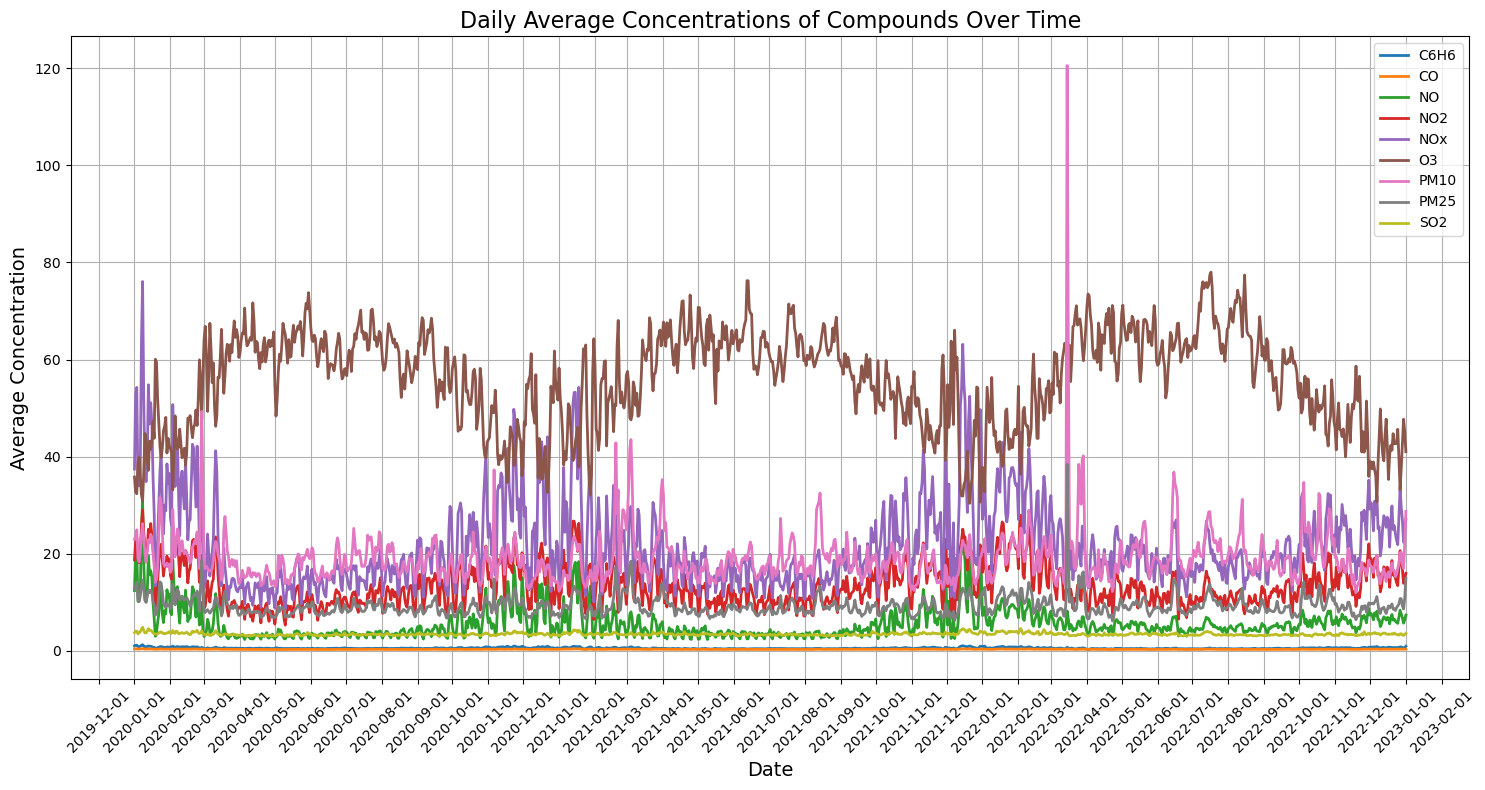

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df_temporal = df_final_filtrado_average.copy()
df_temporal['FECHA'] = pd.to_datetime(df_temporal['FECHA'])
df_temporal = df_temporal.set_index('FECHA')

contaminantes = ['C6H6', 'CO', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM25', 'SO2']
medias_diarias = df_temporal[contaminantes].resample('D').mean()

plt.figure(figsize=(15, 8))
for contaminante in contaminantes:
    plt.plot(medias_diarias.index, medias_diarias[contaminante], label=contaminante, marker='', linewidth=2)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.title('Daily Average Concentrations of Compounds Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Concentration', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
df_final_filtrado_average = df_final_filtrado_average.dropna(subset=['FECHA'])
df_one_hot = pd.get_dummies(df_final_filtrado_average, columns=['TIPO_ESTACION', 'TIPO_AREA', 'ZONA'])

columns_to_convert = ['TIPO_ESTACION', 'TIPO_AREA', 'ZONA']
dummy_columns = [col for col in df_one_hot.columns if any(c in col for c in columns_to_convert)]
df_one_hot[dummy_columns] = df_one_hot[dummy_columns].astype(int)
df_one_hot = df_one_hot.sort_values(by=['FECHA', 'LATITUD_G', 'LONGITUD_G'], ascending=[True, True, True])

In [30]:
print(df_one_hot.describe())

                               FECHA     LATITUD_G    LONGITUD_G  \
count                       13467648  1.346765e+07  1.346765e+07   
mean   2021-07-02 00:29:59.999997184  4.066082e+01 -2.894043e+00   
min              2020-01-01 01:00:00  3.589300e+01 -9.186100e+00   
25%              2020-10-01 00:45:00  3.938417e+01 -5.482855e+00   
50%              2021-07-02 00:30:00  4.107944e+01 -3.250950e+00   
75%              2022-04-02 00:15:00  4.257623e+01 -3.763100e-01   
max              2023-01-01 00:00:00  4.368627e+01  4.323890e+00   
std                              NaN  2.194732e+00  3.209532e+00   

            ALTITUD          C6H6            CO            NO           NO2  \
count  1.346765e+07  1.346765e+07  1.346765e+07  1.346765e+07  1.346765e+07   
mean   3.103828e+02  5.194102e-01  2.764003e-01  5.576739e+00  1.340876e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00 -3.965688e+01  0.000000e+00   
25%    3.400000e+01  1.613684e-01  2.000000e-01  1.322481e+00  4.000000

In [31]:
df_one_hot.to_csv('Dades/estaciones_final_inputed.csv', index=False)

In [32]:
print(df_one_hot.isna().sum())

FECHA                                     0
coord_id                                  0
LATITUD_G                                 0
LONGITUD_G                                0
ALTITUD                                   0
C6H6                                      0
CO                                        0
NO                                        0
NO2                                       0
NOx                                       0
O3                                        0
PM10                                      0
PM25                                      0
SO2                                       0
TIPO_ESTACION_FONDO                       0
TIPO_ESTACION_INDUSTRIAL                  0
TIPO_ESTACION_TRAFICO                     0
TIPO_AREA_RURAL                           0
TIPO_AREA_SUBURBANA                       0
TIPO_AREA_URBANA                          0
ZONA_AGRICOLA                             0
ZONA_AGRICOLA/NATURALEZA                  0
ZONA_COMERCIAL/INDUSTRIAL       

In [34]:

estaciones_por_momento = df_one_hot.groupby('FECHA')['coord_id'].nunique()

print(estaciones_por_momento)

FECHA
2020-01-01 01:00:00    512
2020-01-01 02:00:00    512
2020-01-01 03:00:00    512
2020-01-01 04:00:00    512
2020-01-01 05:00:00    512
                      ... 
2022-12-31 20:00:00    512
2022-12-31 21:00:00    512
2022-12-31 22:00:00    512
2022-12-31 23:00:00    512
2023-01-01 00:00:00    512
Name: coord_id, Length: 26304, dtype: int64


In [33]:
len(momentos_unicos)

26304